# Random Forest Regression

Is a form of Ensemble Learning - where you take multiple algorithms or an algorithm multiple times to make a more powerful model.

STEP1:
- Pick at random K data points from the training set

STEP2:
- Build the decision tree associated to these K data points

STEP3:
- Choose the number Ntree of trees you want to build and repeat STEPS 1&2

STEP4:
- For a new data point, make each one of your Ntree trees predict the value of y and assigne the new data point the average across all the predicted y values

Use the salary position data again!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# import dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
X.shape, y.shape

((10, 1), (10,))

In [4]:
#Fitting random forest regression to dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state=0)
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [6]:
# make a prediction with the regressor
y_pred = regressor.predict(6.5)
y_pred

array([167000.])

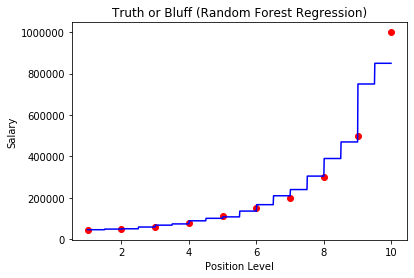

In [7]:
# visualise results

X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In comparison to decision tree regression, we simply get more steps/splits in the graph/data

In [8]:
# can increase the number of trees in the regressor
regressor2 = RandomForestRegressor(n_estimators = 100, random_state=0)
regressor2.fit(X, y)
y_pred = regressor2.predict(6.5)
y_pred

array([158300.])

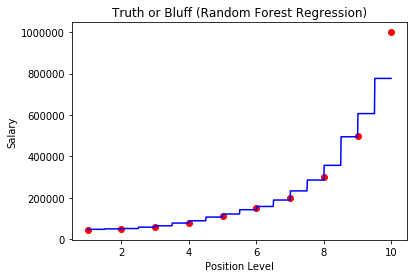

In [9]:
plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor2.predict(X_grid), color='blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

Can see the predicted value is converging to the previous salary of the new employer ~160k

In [10]:
# can increase the number of trees again in the regressor
regressor2 = RandomForestRegressor(n_estimators = 300, random_state=0)
regressor2.fit(X, y)
y_pred = regressor2.predict(6.5)
y_pred

array([160333.33333333])

Converging once again.